# EV Unsupervised Machine Learning: Clustering

## Table of content

1. Importing libraties and dataframe

2. Data preparation

3. The elbow technique

4. K-means clustering

5. Descriptive statistics of the clusters

# 1. Importing libraries and dataframe

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

#### Importing the car dataframe

In [3]:
# Creating shortcut path to data
path_data = r'C:\Users\henri\Documents\Tonia\Learning\CarrrerFoundry\Data Immersion\Achievement 6\EV Analysis in EU\02 Data'

In [4]:
path_data

'C:\\Users\\henri\\Documents\\Tonia\\Learning\\CarrrerFoundry\\Data Immersion\\Achievement 6\\EV Analysis in EU\\02 Data'

In [5]:
# Importing ev_new_variable.pkl
car_df = pd.read_pickle(os.path.join(path_data, 'Prepared Data', 'ev_new_variable.pkl'))

In [6]:
car_df.head()

,engine_type_code,country_code,year,new_car,stock_car,gdp_eur,age_code,income_indicator,currency,income,demographic_indicator_code,population,engine,country,age_group,country_group,gdp_per_capita,new_car_per_1000,stock_car_per_1000
0,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,EUR,2231.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
1,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Median,PPS,4252.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
2,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Mean,EUR,2619.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
3,ALT,AL,2019,3757.0,35881.0,13754.2,TOTAL,Mean,PPS,4992.0,AVG,2854191.0,Other,Albania,Total,other,4.818949e-09,1.31631,12.571338
4,ALT,AL,2019,3757.0,35881.0,13754.2,Y18-64,Median,EUR,2319.0,AVG,2854191.0,Other,Albania,18-64,other,4.818949e-09,1.31631,12.571338


In [7]:
car_df.shape

(89229, 19)

# 2. Data preparation

We need to prepare the data, so that there is no unnecessary information.

##### Age

In [8]:
car_df['age_code'].value_counts(dropna=False)

TOTAL     17748
Y18-64    17748
Y_GE18    17748
Y_GE65    17748
Y_LT18    17748
NaN         489
Name: age_code, dtype: int64

In [9]:
car_df = car_df[car_df['age_code'] == 'TOTAL']

##### Income indicator

In [10]:
car_df['income_indicator'].value_counts(dropna=False)

Median    8874
Mean      8874
Name: income_indicator, dtype: int64

In [11]:
car_df = car_df[car_df['income_indicator'] == 'Median']

##### Currency

In [12]:
car_df['currency'].value_counts(dropna=False)

EUR    4437
PPS    4437
Name: currency, dtype: int64

In [13]:
car_df = car_df[car_df['currency'] == 'EUR']

##### demographic_indicator_code

In [14]:
car_df['demographic_indicator_code'].value_counts(dropna=False)

AVG    4437
Name: demographic_indicator_code, dtype: int64

##### engine

In [15]:
car_df['engine'].value_counts(dropna=False)

Other             1112
Petrol             588
Diesel             581
Hybrid             412
NaN                387
Electric           330
LPG                303
Biofuel            292
Plug-in hybrid     259
Hydrogen           173
Name: engine, dtype: int64

In [16]:
car_df = car_df[car_df['engine'] == 'Electric']

### Removing categorical variables 

In [17]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 21266 to 69402
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   engine_type_code            330 non-null    object 
 1   country_code                330 non-null    object 
 2   year                        330 non-null    int64  
 3   new_car                     233 non-null    float64
 4   stock_car                   311 non-null    float64
 5   gdp_eur                     269 non-null    float64
 6   age_code                    330 non-null    object 
 7   income_indicator            330 non-null    object 
 8   currency                    330 non-null    object 
 9   income                      330 non-null    float64
 10  demographic_indicator_code  330 non-null    object 
 11  population                  330 non-null    float64
 12  engine                      330 non-null    object 
 13  country                     3

To perform the k-means analysis, we need to remove all columns, which are not either int64 or float64. Year in our case is considered a categorical value, so it needs to be also removed.

In [18]:
car_df = car_df.drop(columns = ['engine_type_code', 'country_code', 'age_code', 'income_indicator', 'currency', 
                                'demographic_indicator_code', 'engine', 'country', 'age_group', 'country_group','year'])

In [19]:
# Check
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330 entries, 21266 to 69402
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   new_car             233 non-null    float64
 1   stock_car           311 non-null    float64
 2   gdp_eur             269 non-null    float64
 3   income              330 non-null    float64
 4   population          330 non-null    float64
 5   gdp_per_capita      269 non-null    float64
 6   new_car_per_1000    233 non-null    float64
 7   stock_car_per_1000  311 non-null    float64
dtypes: float64(8)
memory usage: 23.2 KB


In [20]:
car_df.head()

,new_car,stock_car,gdp_eur,income,population,gdp_per_capita,new_car_per_1000,stock_car_per_1000
21266,24.0,124.0,13754.2,2231.0,2854191.0,4.818949e-09,0.008409,0.043445
21286,239.0,362.0,13310.4,2523.0,2837848.0,4.690315e-09,0.084219,0.127561
21307,654.0,2070.0,323910.2,22073.0,8479823.0,3.819775e-08,0.077124,0.244109
21327,1281.0,3386.0,333146.1,23211.0,8546356.0,3.898107e-08,0.149888,0.396192
21347,1677.0,5032.0,344269.2,23260.0,8642699.0,3.983353e-08,0.194037,0.582226


### Removing missing values

In [21]:
# Check for missing values
car_df.isnull().sum()

new_car               97
stock_car             19
gdp_eur               61
income                 0
population             0
gdp_per_capita        61
new_car_per_1000      97
stock_car_per_1000    19
dtype: int64

In [22]:
# Checking number of rows and columns of car df
car_df.shape

(330, 8)

In [23]:
# Removing missing values for "new_car" column
car_df = car_df[car_df['new_car'].isnull() == False]

In [24]:
# Check for missing values
car_df.isnull().sum()

new_car                0
stock_car             16
gdp_eur                0
income                 0
population             0
gdp_per_capita         0
new_car_per_1000       0
stock_car_per_1000    16
dtype: int64

In [25]:
# Checking number of rows and columns of car df
car_df.shape

(233, 8)

In [26]:
# Removing missing values for "stock_car" column
car_df = car_df[car_df['stock_car'].isnull() == False]

In [27]:
# Check for missing values
car_df.isnull().sum()

new_car               0
stock_car             0
gdp_eur               0
income                0
population            0
gdp_per_capita        0
new_car_per_1000      0
stock_car_per_1000    0
dtype: int64

### Standardizing values

In [28]:
car_df.describe()

,new_car,stock_car,gdp_eur,income,population,gdp_per_capita,new_car_per_1000,stock_car_per_1000
count,217.000000,217.000000,2.170000e+02,217.000000,2.170000e+02,2.170000e+02,217.000000,217.000000
mean,11402.423963,28315.769585,5.653853e+05,17764.525346,1.955588e+07,3.247751e-08,0.781923,2.324215
std,32763.557308,69722.200515,8.015667e+05,11036.127857,2.541234e+07,2.025877e-08,1.786176,6.592668
min,1.000000,6.000000,6.671500e+03,2016.000000,3.527210e+05,3.712399e-09,0.000556,0.004636
25%,183.000000,952.000000,4.982930e+04,7586.000000,2.868231e+06,1.525106e-08,0.047085,0.161775
50%,1544.000000,4610.000000,3.023287e+05,16686.000000,8.575280e+06,2.672946e-08,0.173020,0.557356
75%,8892.000000,21842.000000,6.143044e+05,24700.000000,1.958872e+07,4.337240e-08,0.557471,1.720690
max,355961.000000,618460.000000,3.601750e+06,44753.000000,8.338468e+07,1.129496e-07,15.282532,63.892294


To standardize the values, i will remove all the columns with are calculated per capita or per 1000 inhabitants. I will also show GDP and populations in milions.

In [29]:
# Removing gdp_per_capita, new_car_per_1000 and stock_car_per_1000
car_df = car_df.drop(columns = ['gdp_per_capita', 'new_car_per_1000', 'stock_car_per_1000'])

In [30]:
car_df.describe()

,new_car,stock_car,gdp_eur,income,population
count,217.000000,217.000000,2.170000e+02,217.000000,2.170000e+02
mean,11402.423963,28315.769585,5.653853e+05,17764.525346,1.955588e+07
std,32763.557308,69722.200515,8.015667e+05,11036.127857,2.541234e+07
min,1.000000,6.000000,6.671500e+03,2016.000000,3.527210e+05
25%,183.000000,952.000000,4.982930e+04,7586.000000,2.868231e+06
50%,1544.000000,4610.000000,3.023287e+05,16686.000000,8.575280e+06
75%,8892.000000,21842.000000,6.143044e+05,24700.000000,1.958872e+07
max,355961.000000,618460.000000,3.601750e+06,44753.000000,8.338468e+07


In [31]:
# Creating a new column GDP in 1000 EUR
car_df.loc[car_df['gdp_eur'] > 0, 'gdp_1000_eur'] = car_df['gdp_eur']/1000

In [32]:
car_df.describe()

,new_car,stock_car,gdp_eur,income,population,gdp_1000_eur
count,217.000000,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000
mean,11402.423963,28315.769585,5.653853e+05,17764.525346,1.955588e+07,565.385282
std,32763.557308,69722.200515,8.015667e+05,11036.127857,2.541234e+07,801.566659
min,1.000000,6.000000,6.671500e+03,2016.000000,3.527210e+05,6.671500
25%,183.000000,952.000000,4.982930e+04,7586.000000,2.868231e+06,49.829300
50%,1544.000000,4610.000000,3.023287e+05,16686.000000,8.575280e+06,302.328700
75%,8892.000000,21842.000000,6.143044e+05,24700.000000,1.958872e+07,614.304400
max,355961.000000,618460.000000,3.601750e+06,44753.000000,8.338468e+07,3601.750000


In [33]:
# Creating a new column Population in 1000 inhabitants
car_df.loc[car_df['population'] > 0, 'population_1000'] = car_df['population']/1000

In [34]:
car_df.describe()

,new_car,stock_car,gdp_eur,income,population,gdp_1000_eur,population_1000
count,217.000000,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,217.000000
mean,11402.423963,28315.769585,5.653853e+05,17764.525346,1.955588e+07,565.385282,19555.876249
std,32763.557308,69722.200515,8.015667e+05,11036.127857,2.541234e+07,801.566659,25412.338742
min,1.000000,6.000000,6.671500e+03,2016.000000,3.527210e+05,6.671500,352.721000
25%,183.000000,952.000000,4.982930e+04,7586.000000,2.868231e+06,49.829300,2868.231000
50%,1544.000000,4610.000000,3.023287e+05,16686.000000,8.575280e+06,302.328700,8575.280000
75%,8892.000000,21842.000000,6.143044e+05,24700.000000,1.958872e+07,614.304400,19588.715000
max,355961.000000,618460.000000,3.601750e+06,44753.000000,8.338468e+07,3601.750000,83384.680000


In [35]:
# Dropping columns gdp_eur and population
car_df = car_df.drop(columns = ['gdp_eur', 'population'])

# 3. The elbow technique

In [36]:
# Defines the range of potential clusters in the data.
num_cl = range(1, 10) 

# Defines k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [37]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(car_df).score(car_df) for i in range(len(kmeans))]  

C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [38]:
score

[-1447818088249.7522,
 -569375622948.1494,
 -371063828899.1057,
 -246165624195.89124,
 -160712599614.01498,
 -128318253852.09528,
 -105886150929.35912,
 -88798756755.53455,
 -75974085637.13199]

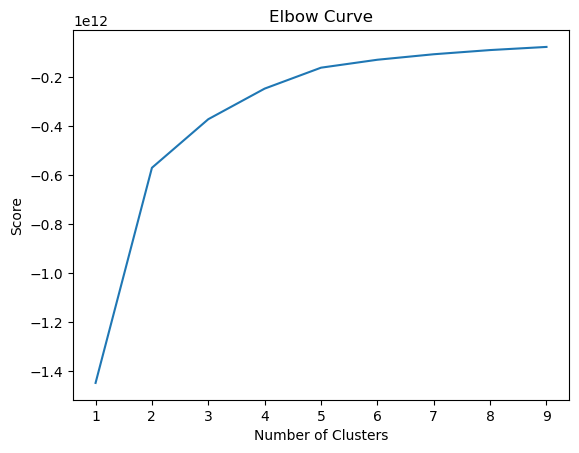

In [39]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In our dataframe, there's a large jump from one to two, but after that, the curve straightens out. This means that the optimal count for the clusters is two.

# 4. K-means clustering

In [40]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2) 


In [41]:
# Fit the k-means object to the data.

kmeans.fit(car_df)

C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [42]:
car_df['clusters'] = kmeans.fit_predict(car_df)

C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\henri\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [43]:
car_df.head()

,new_car,stock_car,income,gdp_1000_eur,population_1000,clusters
21266,24.0,124.0,2231.0,13.7542,2854.191,1
21286,239.0,362.0,2523.0,13.3104,2837.848,1
21307,654.0,2070.0,22073.0,323.9102,8479.823,1
21327,1281.0,3386.0,23211.0,333.1461,8546.356,1
21347,1677.0,5032.0,23260.0,344.2692,8642.699,1


In [45]:
# Exporting the clustered dataframe to csv
car_df.to_csv(os.path.join(path_data, 'Prepared Data', 'ev_cluster.csv'))

In [44]:
car_df['clusters'].value_counts()

0    208
1      9
Name: clusters, dtype: int64

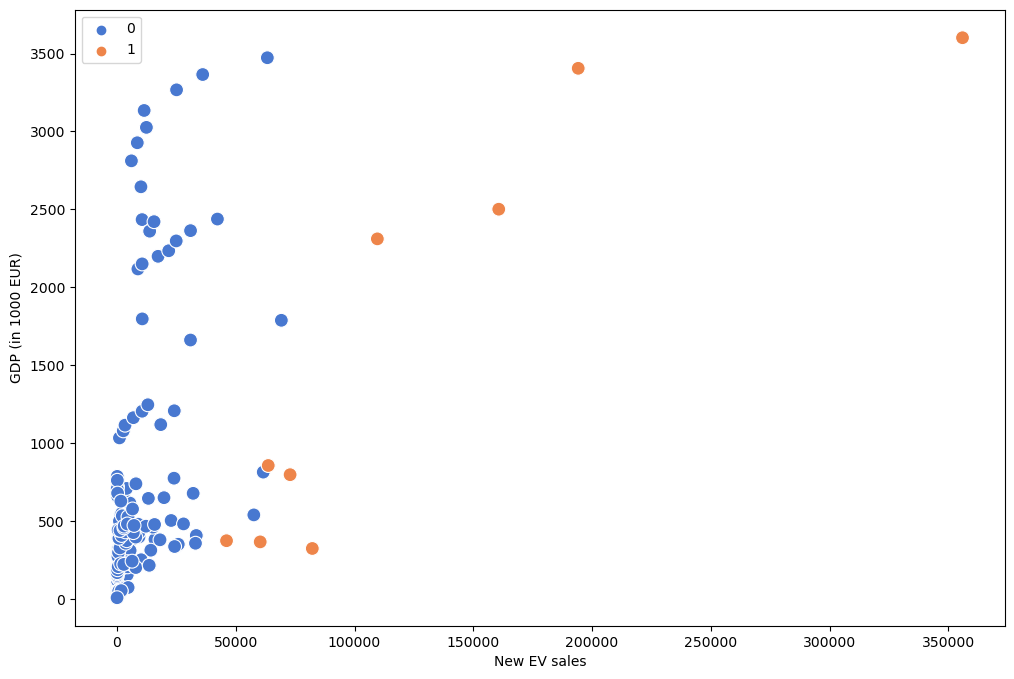

In [45]:
# Plot the clusters for the "GDP per capita" and "New car per 1000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=car_df['new_car'], y=car_df['gdp_1000_eur'], hue=kmeans.labels_, s=100, palette='muted')

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('New EV sales') # Label x-axis.
plt.ylabel('GDP (in 1000 EUR)') # Label y-axis.
plt.show()

From the above plot, we see two clusters. 

Cluster 0 (blue) contains new EV car sales up to ca 75k per year, while the GDP ranges from almost 0 to up 3.5 mio EUR.

Cluster 1 (orange) contains 9 observations, with medium to high level of new EV car sales and the GDP spereading from low to high.

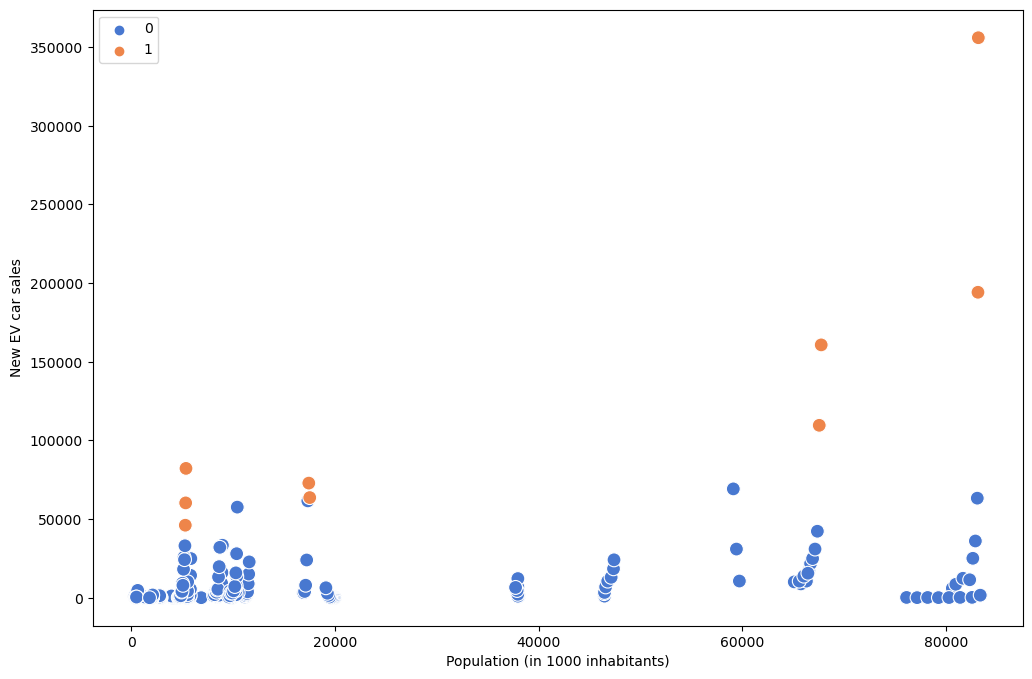

In [46]:
# Plot the clusters for the "Population" and "New car per 1000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=car_df['population_1000'], y=car_df['new_car'], hue=kmeans.labels_, s=100, palette='muted') 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population (in 1000 inhabitants)') # Label x-axis.
plt.ylabel('New EV car sales') # Label y-axis.
plt.show()

Here we can see two clusters: 

Cluster 0 (blue): countries with all sizes of population, with new EV car sales up to ca 75k per year

Cluster 1 (orange): nine observations of higher sales of EV cars, with two main groups of population: below 30 mio and above 70 mio.

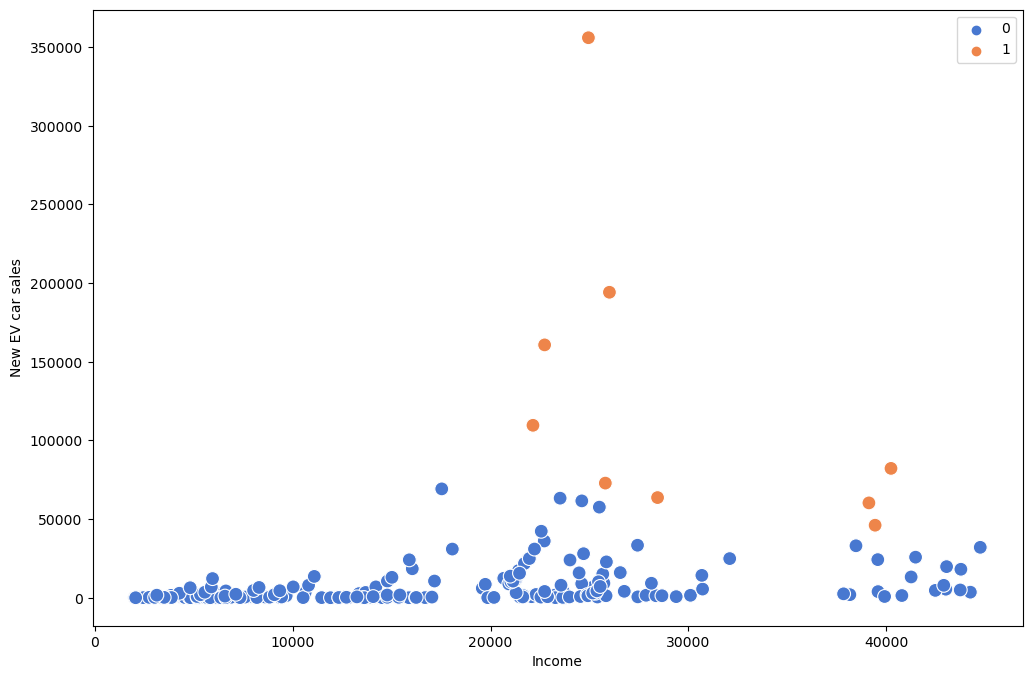

In [47]:
# Plot the clusters for the "Income" and "New car per 1000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=car_df['income'], y=car_df['new_car'], hue=kmeans.labels_, s=100, palette='muted') 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Income') # Label x-axis.
plt.ylabel('New EV car sales') # Label y-axis.
plt.show()

Cluster 0 (blue): income from very low to very high and new sales car up to 30000 per year

Cluster 1 (orange): the outlier with income around 25000 and new EV car sales of 350000

Cluster 2 (green): a mix of medium (20-30k) and quite high (ca. 40k) income countries with medium to high sales of new EV cars (75-200k).

Cluster 3 (red): low income countries (up to 20k), with very low new EV car sales (below 50k)

Cluster 4 (purple): a mix of medium (18-35k) and quite high (ca. 40k) countries with low sales of new EV cars (lower than the green cluster).

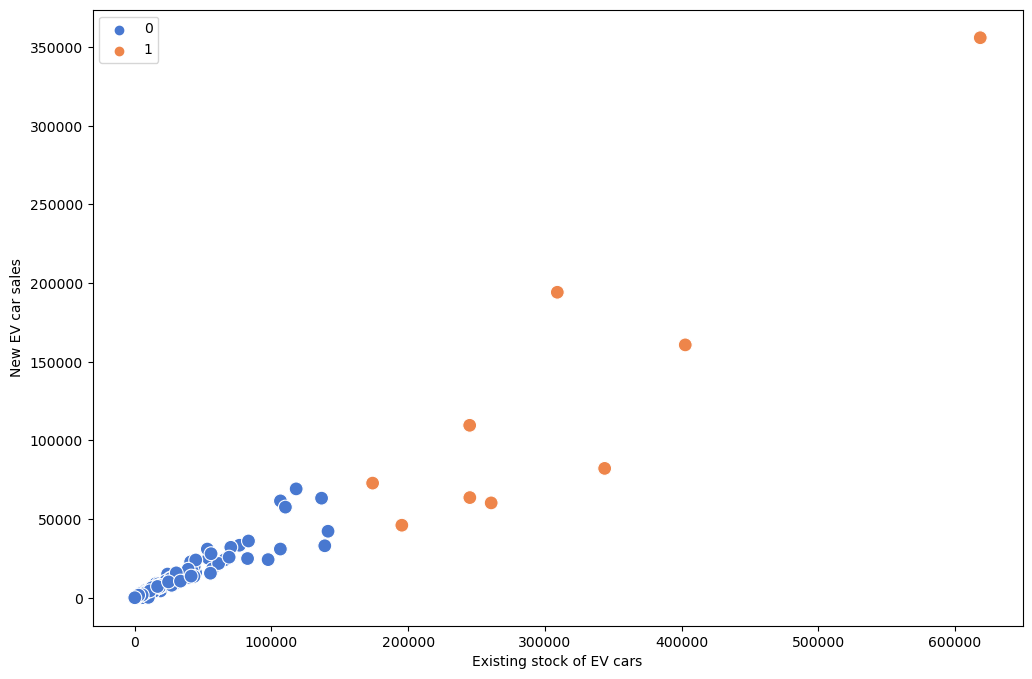

In [48]:
# Plot the clusters for the "stock_car" and "New car per 1000" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=car_df['stock_car'], y=car_df['new_car'], hue=kmeans.labels_, s=100, palette='muted') 

# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Existing stock of EV cars') # Label x-axis.
plt.ylabel('New EV car sales') # Label y-axis.
plt.show()

We can see a linear correlation between the two variables. The more EV cars are already in the country, the more new EV car sales take place.

Cluster 0 (blue): low existing stock of the EV cars (up to 150k) and new sales car up to 75000 per year

Cluster 1 (orange): nine observations with existing stock of over ca 175k and new EV car sales of above 50k.

# 5. Descriptive statistics of the clusters

In [49]:
# Renaming clusters by colors
car_df.loc[car_df['clusters'] == 0, 'cluster'] = 'blue'
car_df.loc[car_df['clusters'] == 1, 'cluster'] = 'orange'

In [50]:
# Calculating statistics
car_df.groupby('cluster').agg({'new_car':['mean', 'median'], 
                         'stock_car':['mean', 'median'], 
                         'income':['mean', 'median'],
                          'gdp_1000_eur':['mean', 'median'],
                          'population_1000':['mean', 'median']})

new_car               stock_car                  income  \
                  mean   median           mean    median          mean   
cluster                                                                  
blue       6388.485577   1290.5   16108.346154    3947.5  17240.514423   
orange   127280.111111  82212.0  310442.888889  260689.0  29875.000000   

                 gdp_1000_eur            population_1000              
          median         mean     median            mean      median  
cluster                                                               
blue     15882.5   519.987862  271.61145    18706.341130   8530.3425  
orange   26008.0  1614.570100  855.47000    39189.576778  17533.0440

From the above table, we see that the highest mean and median stock and new EV car sales are in the orange cluster. This cluster also represents the high mean and median income, GDP and the population. We can assume that in this cluster we could find big european countries with strong economy.

On the other hand, the blue cluster contains countries with the lowest mean and median exisitng EV car stock and new EV car sales. This cluster contains countries with the lowest mean and median population, GDP and income. Since this cluster has 208 observations, it has to contain all the other european countries.

In the future steps, we could deduct which countries belong to each of the cluster and perhaps try to find additional information which will allow us to undestand the EV cars sakes and existing stock, e.g. are there subsidies in these countries or income tax deductions?